In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [ ]:
pip install QuantStats

In [ ]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning:

stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.



In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [ ]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()


window_size = 10
start_index = window_size
end_index = len(df)

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.to_csv('updated.csv')

In [ ]:
df = pd.read_csv('/content/updated.csv',index_col='Date')
window_size = 10
start_index = window_size
end_index = len(df)

In [ ]:
df.index_col='Date'

In [ ]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [ ]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700,0.000000,0.000000,0.0
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700,0.000000,100.000000,6202700.0
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500,0.000000,100.000000,12265200.0
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200,0.000000,100.000000,17597400.0
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100,0.000000,100.000000,22888500.0
2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100,0.000000,100.000000,29526600.0
2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900,0.000000,100.000000,34768500.0
2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500,0.000000,100.000000,41827000.0
2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900,0.000000,100.000000,49095900.0


In [ ]:
del df['Unnamed: 0']

KeyError: ignored

In [ ]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Time,,,,,,,,
2017-01-01 22:00:00,1.05236,1.05253,1.05221,1.05227,1.435400e+08,0.000000,0.000000,0.000000e+00
2017-01-01 23:00:00,1.05227,1.05426,1.05226,1.05282,2.531400e+08,0.000000,100.000000,2.531400e+08
2017-02-01 00:00:00,1.05283,1.05283,1.05268,1.05281,1.314000e+08,0.000000,98.079561,1.217400e+08
2017-02-01 01:00:00,1.05282,1.05286,1.05225,1.05240,2.739400e+08,0.000000,53.074859,-1.522000e+08
2017-02-01 02:00:00,1.05239,1.05240,1.05164,1.05220,2.581400e+08,0.000000,42.766034,-4.103400e+08
2017-02-01 03:00:00,1.05219,1.05244,1.05184,1.05226,2.288180e+09,0.000000,46.145501,1.877840e+09
2017-02-01 04:00:00,1.05226,1.05232,1.05181,1.05193,7.118000e+08,0.000000,34.188509,1.166040e+09
2017-02-01 05:00:00,1.05195,1.05197,1.05136,1.05161,2.882100e+08,0.000000,26.907565,8.778299e+08
2017-02-01 06:00:00,1.05163,1.05176,1.05113,1.05172,3.908800e+08,0.000000,32.248916,1.268710e+09


In [ ]:
df['Date']

KeyError: ignored

In [ ]:


env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])


In [ ]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100
2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900
2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500
2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900


In [ ]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.0417  |
| fps                | 15       |
| nupdates           | 1        |
| policy_entropy     | 0.688    |
| total_timesteps    | 5        |
| value_loss         | 2.1      |
---------------------------------
---------------------------------
| explained_variance | 0.00384  |
| fps                | 304      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 12.8     |
---------------------------------
---------------------------------
| explained_variance | -0.00411 |
| fps                | 340     

In [ ]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 636.0686200000016, 'total_profit': 0.00035777258204836276, 'position': 0}


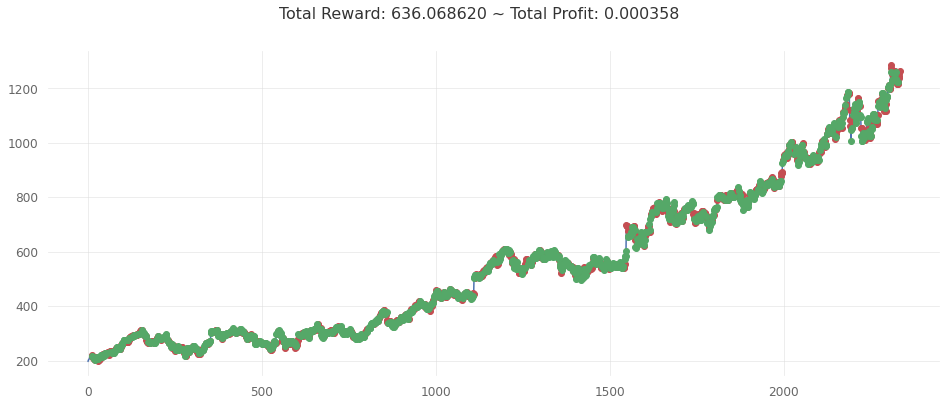

In [ ]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -99.96%
CAGR﹪                     -57.69%

Sharpe                     -4.33
Smart Sharpe               -4.02
Sortino                    -4.69
Smart Sortino              -4.35
Sortino/√2                 -3.32
Smart Sortino/√2           -3.08
Omega                      0.17

Max Drawdown               -99.96%
Longest DD Days            3362
Volatility (ann.)          19.43%
Calmar                     -0.58
Skew                       -0.13
Kurtosis                   49.0

Expected Daily %           -0.34%
Expected Monthly %         -6.9%
Expected Yearly %          -54.78%
Kelly Criterion            -87.25%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.35%
Expected Shortfall (cVaR)  -2.35%

Gain/Pain Ratio       

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


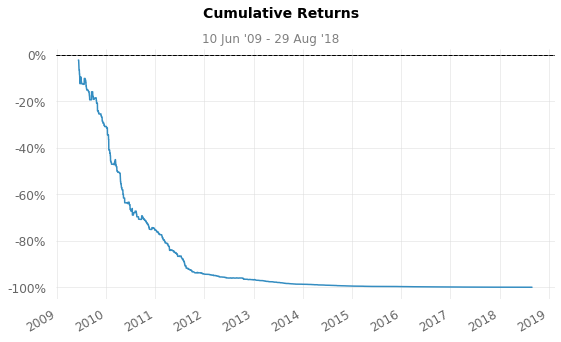

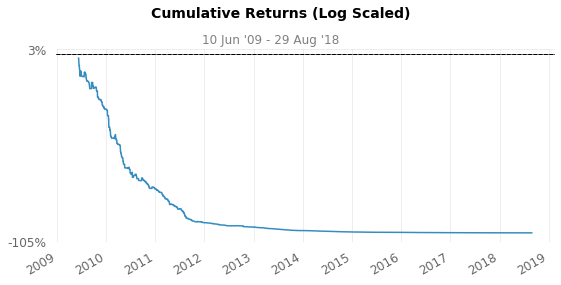

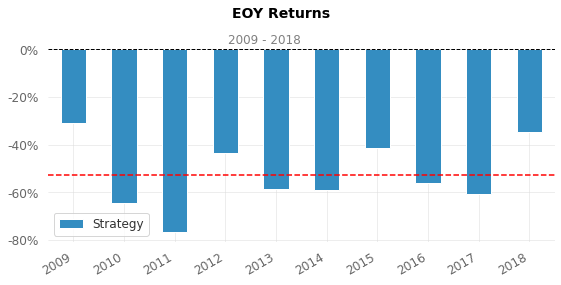

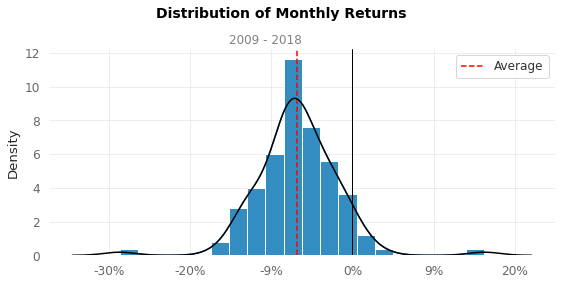

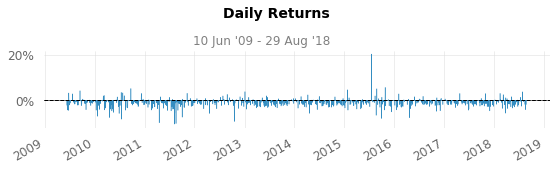

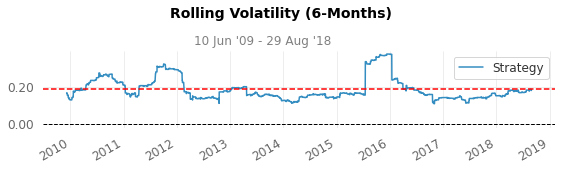

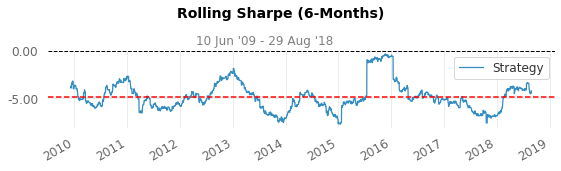

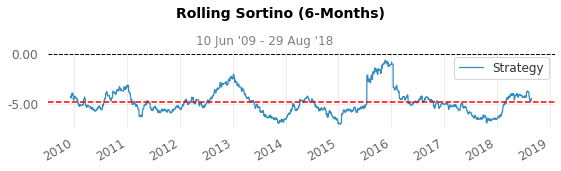

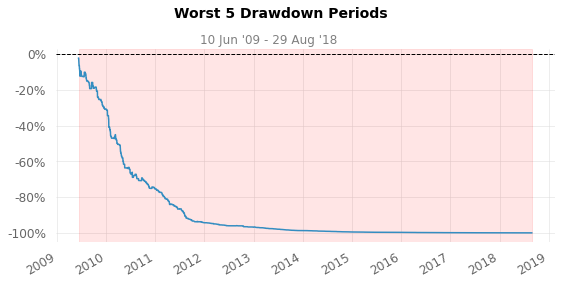

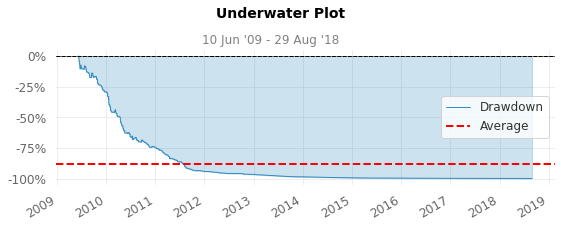

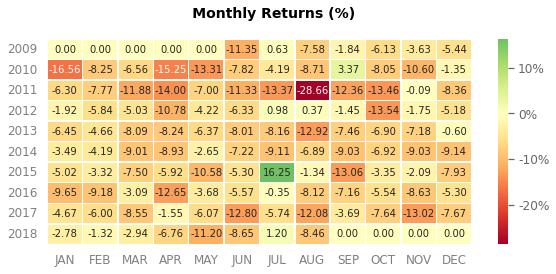

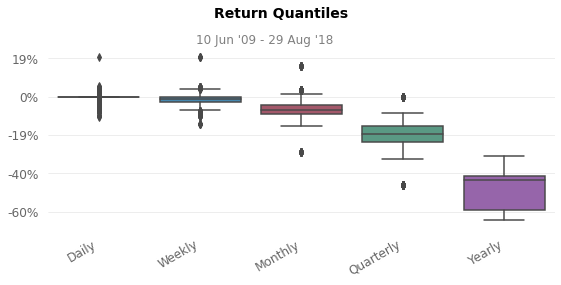

In [ ]:

qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')